1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.interpolate import interp1d
import pandas as pd
from scipy import stats
from scipy.optimize import curve_fit
from scipy.stats import f

%matplotlib inline

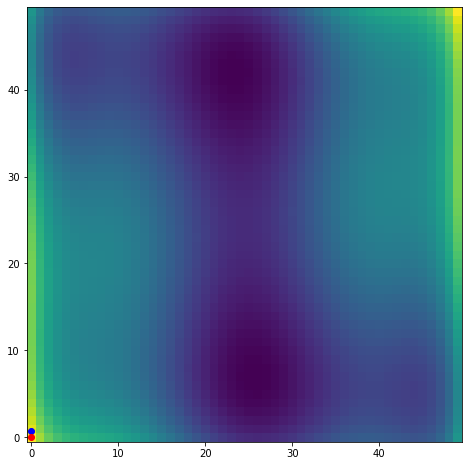

In [26]:
#global minima : The point at which a function takes the minimum value
#when the goal is to minimize the function and solved using optimization algorithms such as gradient descent,
#it may so happen that function may appear to have a minimum value at different points
#Those several points which appear to be minima but are not the point where the function actually takes the minimum value are called local minima.

#Defining the function

def camel(x):
    return ((4 - 2*1*(x[0]**2) + ((x[0]**4)/3))*x[0]**2) +  (x[0]*x[1] + ((4*(x[1]**2) - 4)*(x[1]**2)))

#making grid to evaluate for the plotting
x = np.linspace(-2, 2)
y = np.linspace(-1, 1)
gridx, gridy = np.meshgrid(x,y)  
res = camel([gridx, gridy])
plt.figure(figsize=(12, 8))
plt.imshow(res, origin = 'lower')

#Finding the global minima
sol1 = optimize.minimize(camel, x0 = [0.5,0.5])
plt.scatter(sol1.x[0], sol1.x[1], color = 'b')

# If initial guess of (x,y) = (0,0)
sol2 = optimize.minimize(camel, x0 = [0,0])
plt.scatter(sol2.x[0], sol2.x[1], color = 'r')
plt.show()

The global minima(alpha square) is one with the function (x, y) = (0,0)

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

Fit function : 20.371184 * sin( 3.104248 * x) + 15
Fit function: 25.434447 * sin( 2.169717 * (x - 0.704301)) - 35


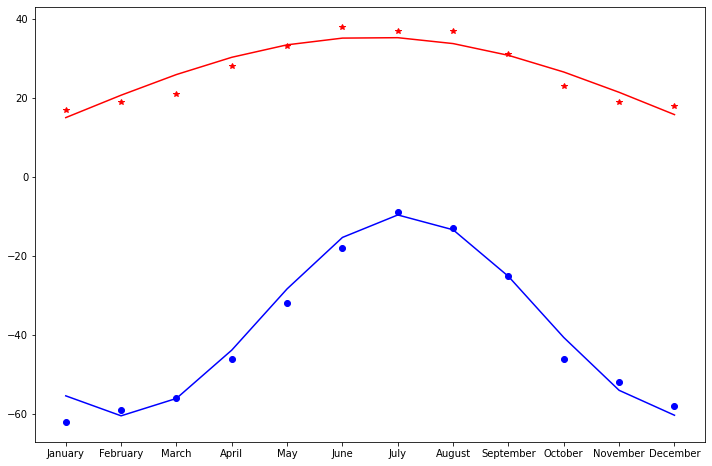


The fit result is reasonable


In [27]:
#Data
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
nmax = [17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]
nmin = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]


plt.figure(figsize=(12, 8))
plt.plot(month, nmax, 'r*')
plt.plot(month, nmin, 'bo')


# Computing max and min value
def degree(nmax, nmin):
    def common_elements(list1, list2):
        return [value for i in nmax if i == max(nmax) in list2]
    for i in nmax :
        nmin.append(i)
        if nmax == max(nmax):
            print('Max = ', nmax())
        elif nmin == min(nmin):
            print('Min = ', min(nmin))
        return 


#Fit this function to the data with `scipy.optimize.curve_fit()`
y = np.linspace(0,1,12)
x = month
def max_func (x, A, numb):
        return (A * np.sin(numb * x) + 15)
popt, pcov = optimize.curve_fit(max_func, y, nmax, p0=[2, 2], full_output=False)
print('Fit function : %f * sin( %f * x) + 15'% (popt[0],popt[1]) )
plt.plot(x,max_func(y,popt[0],popt[1]), 'r')
    
def min_func (x, A, numb,l):
        return (A * np.sin(np.pi * (numb * x - l)) - 35)
popt_min, pcov_min = optimize.curve_fit(min_func, y, nmin, p0=[2, 2,0.5], full_output=False)
print('Fit function: %f * sin( %f * (x - %f)) - 35'% (popt_min[0],popt_min[1],popt_min[2]) )
plt.plot(x,min_func(y,popt_min[0],popt_min[1],popt_min[2]), 'b')

plt.show()

print("\nThe fit result is reasonable")

3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

From Pickle: 
 {'residuals': array([ 1.1       , -1.95      , -7.2       , ...,  0.08333333,
        0.16666667,  0.08333333]), 'distances': array([16. ,  6.3,  3.4, ...,  1.7, 19.1,  2.6])}

In DataFrame: 
        residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
2      -7.200000        3.4
3      -4.150000        8.4
4      -6.590000        1.7
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[11131 rows x 2 columns]


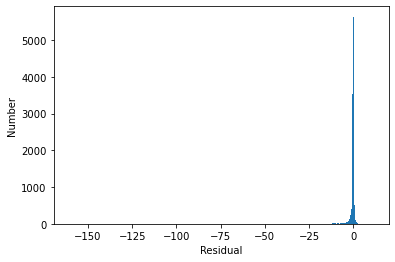

In [28]:
#Data
import pandas as pd

data = np.load('data/residuals_261.pkl', allow_pickle=True)
print("From Pickle: \n", data)

#converting to dataframe
df = pd.DataFrame(data.item())
print("\nIn DataFrame: \n", df)

#plotting raw histogram
h, bins, _  = plt.hist(df['residuals'], bins=300)
plt.xlabel('Residual')
plt.ylabel('Number')
plt.show()

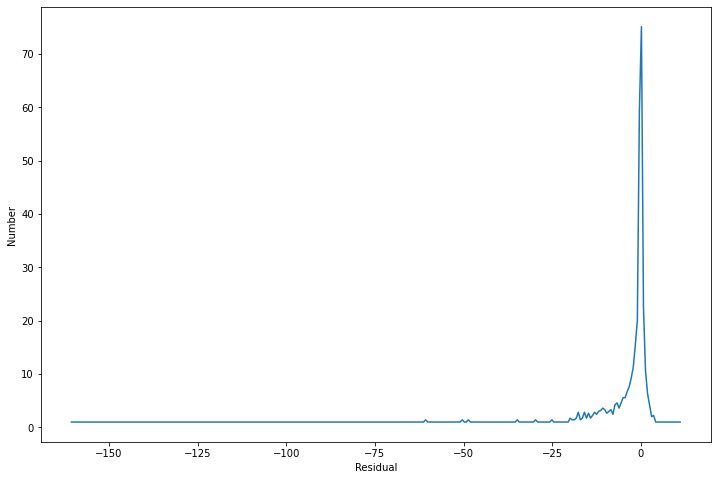

In [29]:
#plotting without outliers to see it clrearly
df = df[df['residuals'] > -10]

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_xlabel('Residual')
ax.set_ylabel('Number')
centers = 0.5 * (bins[:-1] + bins[1:])
sigma_i = np.sqrt(np.abs(h))
sigma_i[sigma_i == 0] = 1
ax.plot(centers, sigma_i)

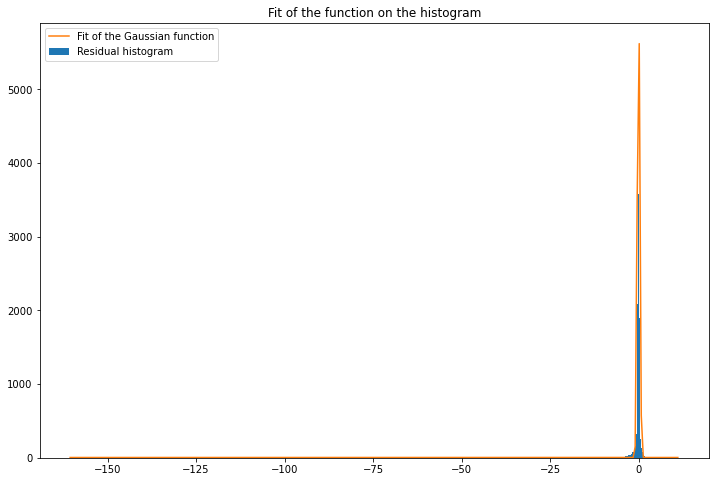

In [30]:
#fit it to the histogram of the residuals
def gaussian(x, a, b, x0, sigma):
    return a + b * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))
    
popt, pcov = optimize.curve_fit(gaussian, centers, h, full_output=False)
fig, ax = plt.subplots(figsize=(12,8))
plt.hist(df['residuals'], bins=100, label='Residual histogram')
plt.plot(centers, gaussian(centers, *popt), label='Fit of the Gaussian function')
ax.set_title('Fit of the function on the histogram')
ax.legend()   

In [31]:
#degrees of Freedom
ndof = len(centers) - 1

#calculate the chi^2
chi2 = np.sum(((h - gaussian(centers, *popt))**2) / sigma_i)

#goodness-of-fit test. Is the p-value of the fit satisfactory
pvalue = 1. - stats.chi2.cdf(chi2, ndof)
print("p-value =", pvalue, "where the value is less than 0.05, so it means that the test hyphotesis is rejected and it is unsatisfactied.")

p-value = 0.0 where the value is less than 0.05, so it means that the test hyphotesis is rejected and it is unsatisfactied.


4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

Data 
                0          1
0     1995.00274   0.944444
1     1995.00548  -1.611110
2     1995.00821  -3.555560
3     1995.01095  -9.833330
4     1995.01369 -10.222200
...          ...        ...
6674  2013.27379   7.333330
6675  2013.27652  10.000000
6676  2013.27926  10.555600
6677  2013.28200   8.944440
6678  2013.28474  11.166700

[6679 rows x 2 columns]

Best fit parameter
 a:  -9.997257146630904  b:  12.324439807265465  c:  9.253976705457845 

Average temperature in Munchen:  9.25 

Best fit parameter
 a:  -10.00177794589103  b:  0.9990498359350594  c:  24.32759869778901 



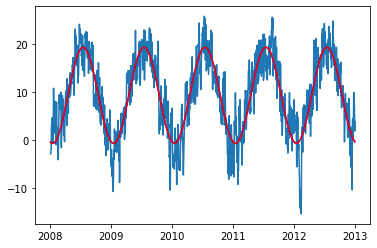

CL: 0.497 additional parameter necessary: NO


In [32]:
#extracting data and define the formula
file = "data/munich_temperatures_average_with_bad_data.txt"
data = pd.read_csv(file, sep=' ', header = None)
print('Data \n', data)

#selecting data  between 2008-2012
mask = (data[1]<50) & (data[1]>-50) & (data[0]>2008) & (data[0]<2013)
clear = data[mask]
time = clear[0]
temperature = clear[1]


#function
def formula(x, a, b, c):
     return a*np.cos( (2*np.pi*x) + b) + c

def gformula(x, a, b, c, d):
     return a*np.cos( (2*np.pi*x*b) + c) + d
     
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    CL = 1. - f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print('CL: %.3f' % CL, 'additional parameter necessary:', 'YES' if CL < 0.10 else 'NO')
    return CL

#fitting best parameters
popt, pcov = optimize.curve_fit(formula, time, temperature, p0=[1,1,1], full_output=False)
gopt, gcov = optimize.curve_fit(gformula, time, temperature, p0=[1,1,1,1], full_output=False)

#plotting data from 2008 - 2012
plt.figure()
plt.plot(time,temperature)
plt.plot(time,formula(time,*popt),label="fit f()",color="b")
print("\nBest fit parameter\n a: ",popt[0]," b: ",popt[1], " c: ",popt[2],"\n")
print("Average temperature in Munchen: ",round(temperature.mean(),2),"\n")

plt.plot(time,gformula(time,*gopt),label="fit g()",color="r")
print("Best fit parameter\n a: ",gopt[0]," b: ",gopt[1], " c: ",gopt[2],"\n")
plt.show()

ssr_1 = np.sum((formula(time,*popt) - temperature)**2)
ssr_2 = np.sum((gformula(time,*gopt) - temperature)**2)
N = len(time)
cl_1_vs_2 = Ftest(ssr_1, ssr_2, 3, 4, N, verbose=True)